In [1]:
# pip install -r requirements.txt

In [1]:
import os
import argparse
from pydub import AudioSegment
import librosa
from IPython.display import Audio
import IPython.display as ipd
import matplotlib.pyplot as plt
from cmath import exp, pi
import numpy as np
import soundfile as sf
import numpy.fft as fft
from scipy.io import wavfile

In [5]:
path = ["Jason/", "Karina/", "Rifa/"]

file_path = []
for i in path:
    for(dirpath, dirnames, filenames) in os.walk(i):
        res = [i+x for x in filenames]
        file_path += res
file_path

['Jason/s4.wav',
 'Jason/s2.wav',
 'Jason/s3.wav',
 'Jason/s1.wav',
 'Karina/Sentence1.wav',
 'Karina/Sentence3.wav',
 'Karina/Sentence2.wav',
 'Karina/Sentence4.wav',
 'Rifa/Sentence 3.wav',
 'Rifa/Sentence 2.wav',
 'Rifa/Sentence 1.wav',
 'Rifa/Sentence 4.wav']

In [4]:
formats_to_convert = ['.m4a']

for i in path:
    for (dirpath, dirnames, filenames) in os.walk(i):
        for filename in filenames:
            if filename.endswith(tuple(formats_to_convert)):

                filepath = dirpath + '/' + filename
                (path, file_extension) = os.path.splitext(filepath)
                file_extension_final = file_extension.replace('.', '')
                try:
                    track = AudioSegment.from_file(filepath,
                            file_extension_final)
                    wav_filename = filename.replace(file_extension_final, 'wav')
                    wav_path = dirpath + '/' + wav_filename
                    print('CONVERTING: ' + str(filepath))
                    file_handle = track.export(wav_path, format='wav')
                    os.remove(filepath)
                except:
                    print("ERROR CONVERTING " + str(filepath))

In [10]:
# function custom in use 
def lowest_power_of_2(x):
    i = 1;
    while i < x : i*=2;
    return i

In [27]:
# sample the input audio file to 500, 2000 and 16000Hz;
freq = [500, 2000, 16000]

# File in file_path from previous cells
for i in file_path:
    # reading the audio file using wavfile from scipy library
    sample_rate, audio_data = wavfile.read(i)

    # Initial Audio Processing
    x = len(audio_data.shape)
    if(x > 1) :
        audio_data = audio_data[:,0]
    audio = np.asarray(audio_data)
    N = len(audio)
    lp2 = lowest_power_of_2(N)
    audio = np.pad(audio, (0,lp2 - N), 'constant')
    dur = len(audio)/float(sample_rate)

    # frequency change
    for f in freq : 
        nsample = int( dur * f)
        a_freq = np.interp(np.linspace(0, len(audio), nsample, endpoint = False), np.arange(len(audio)), audio)
        wavfile.write("Audiorecording/" + str(f) + "_" + i.split("/")[0] + i.split("/")[1], f, a_freq.astype(np.int16))

In [10]:
def dft(x):
    N = len(x)
    if N <= 1:
        return x
    if N % 2 != 0: 
        x = np.append(x, np.zeros(1))
        N += 1
    even = dft(x[::2])
    odd = dft(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]    
    f = [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]
    return f

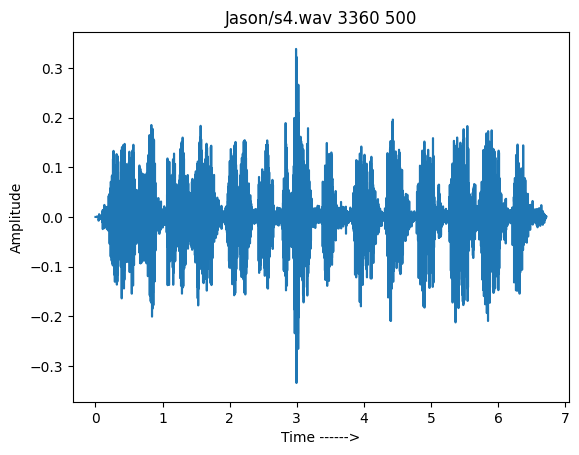

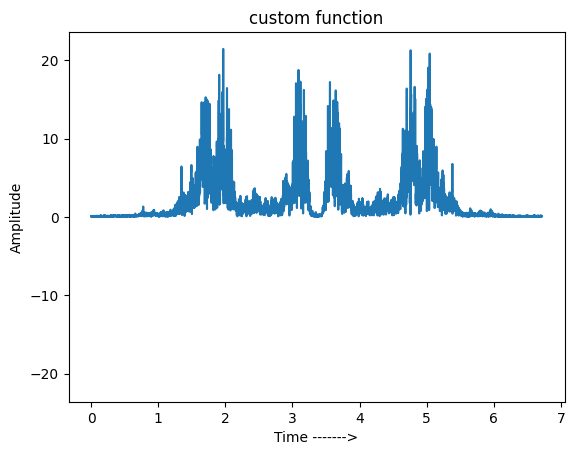

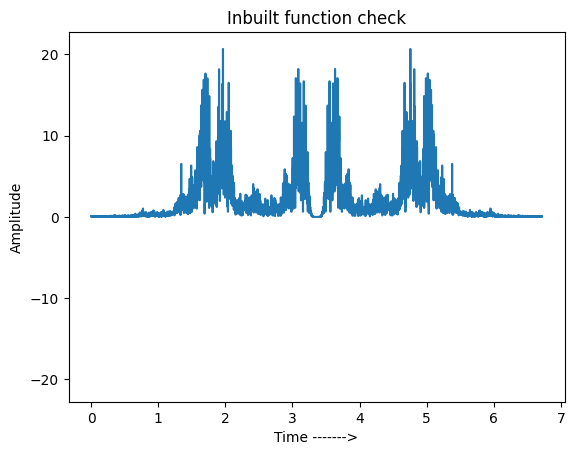

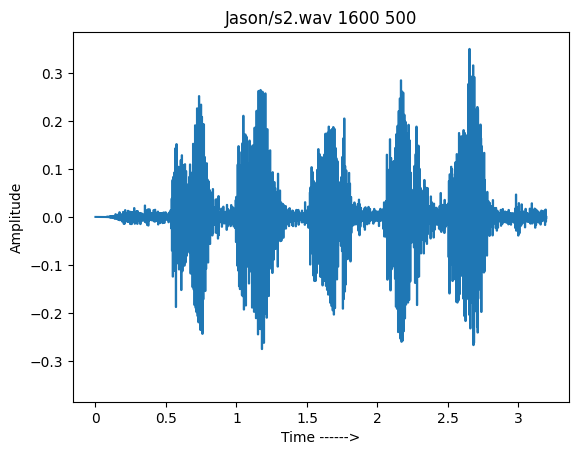

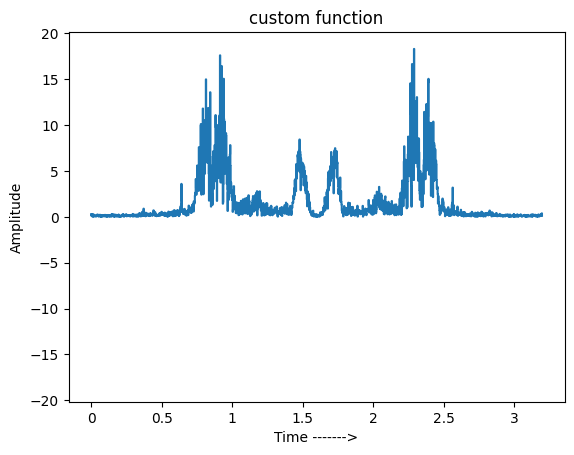

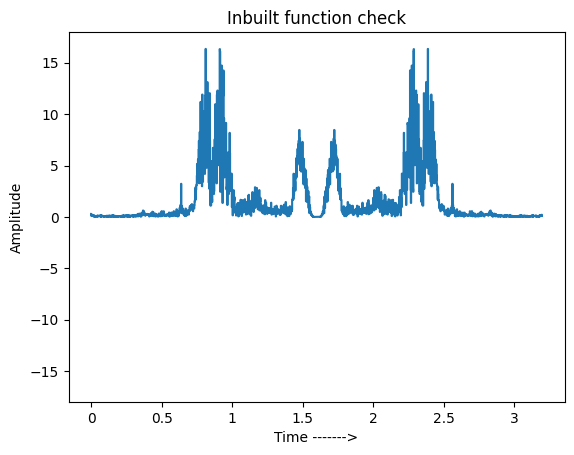

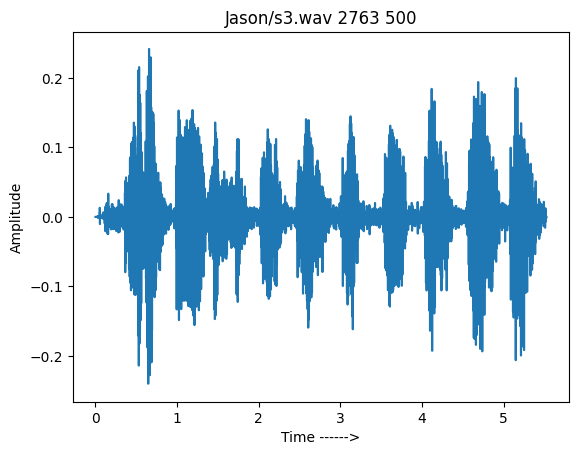

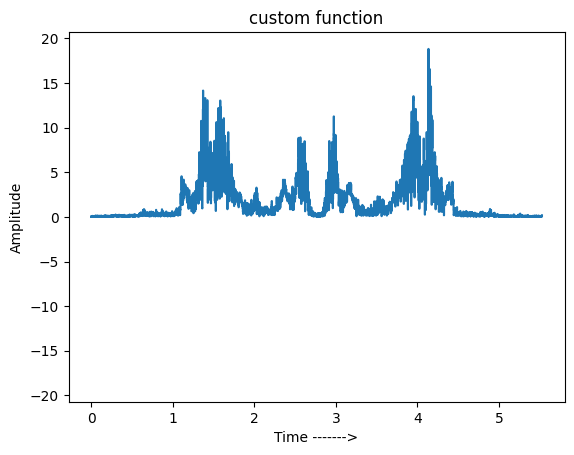

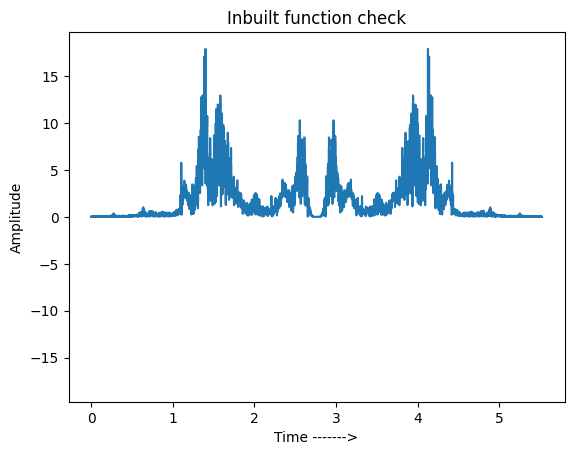

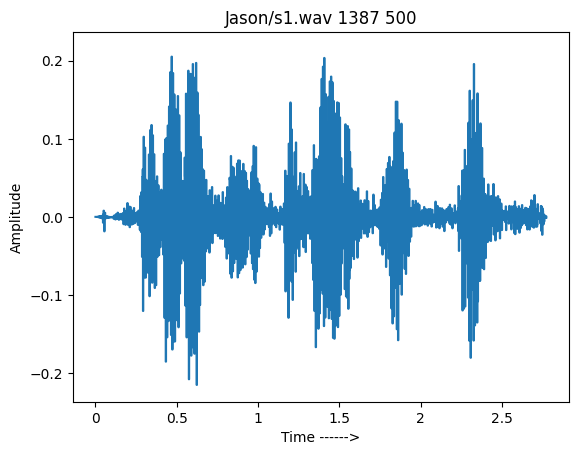

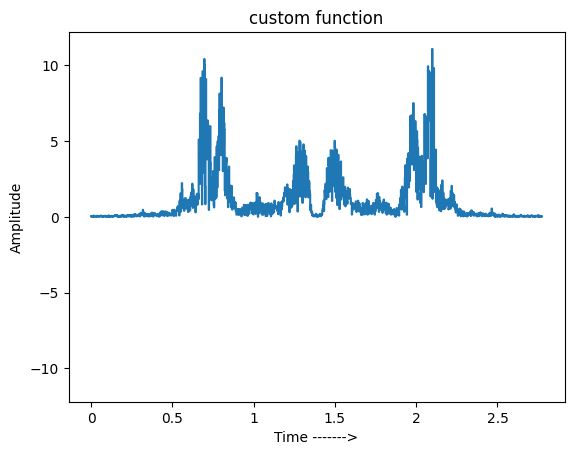

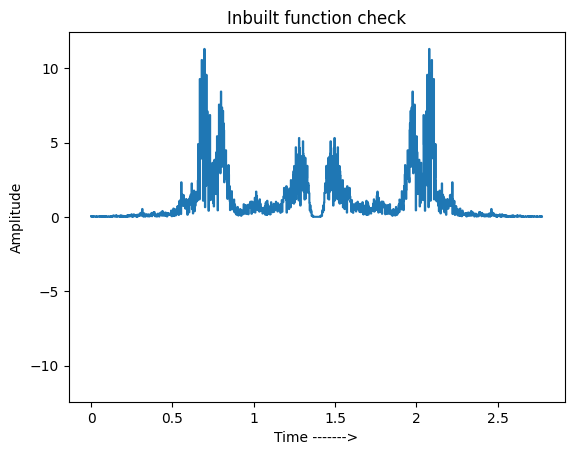

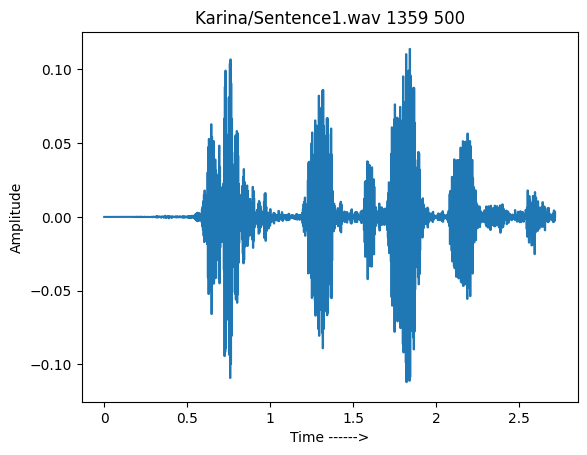

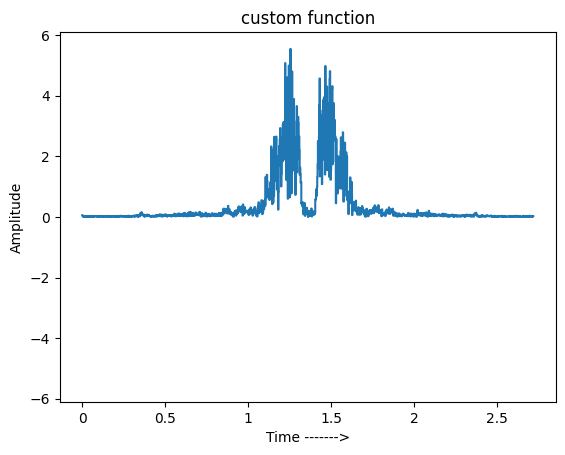

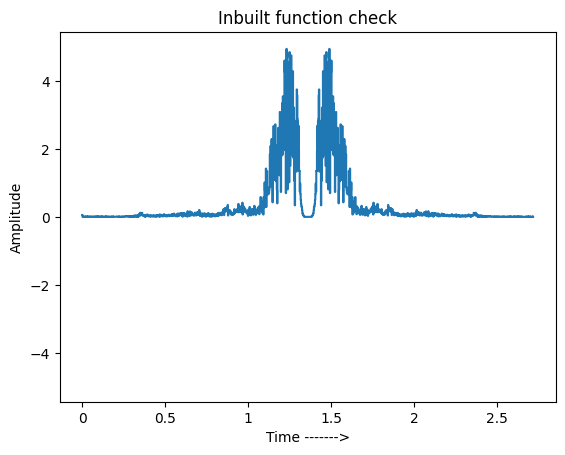

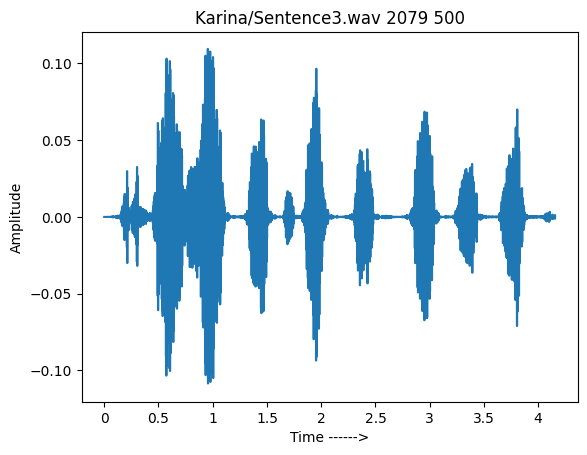

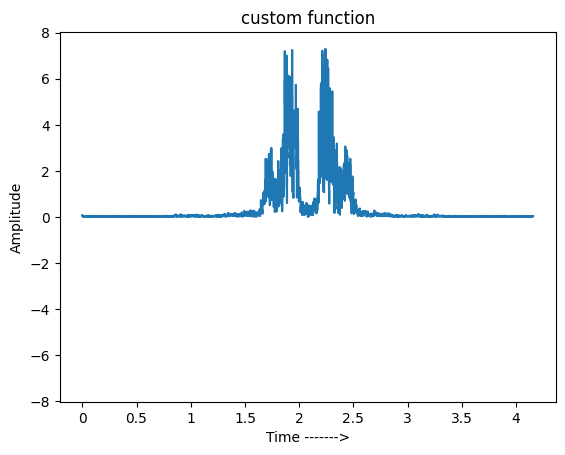

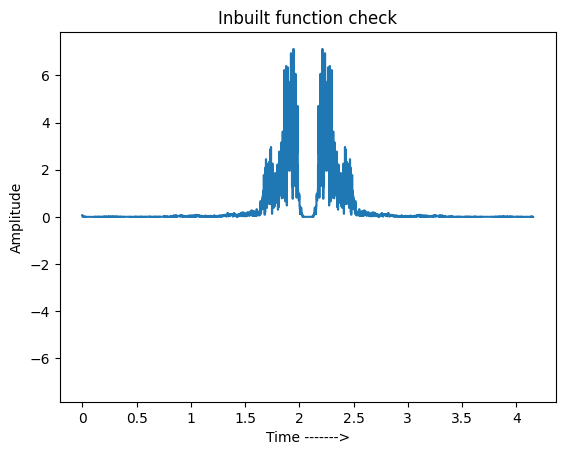

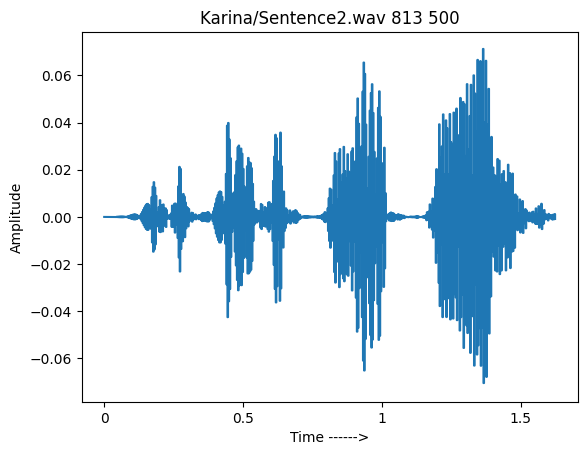

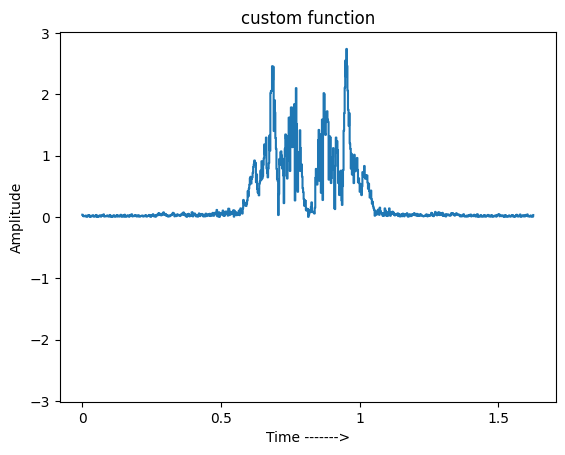

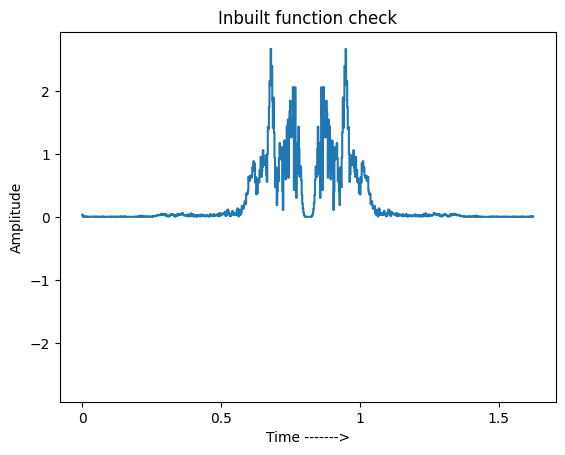

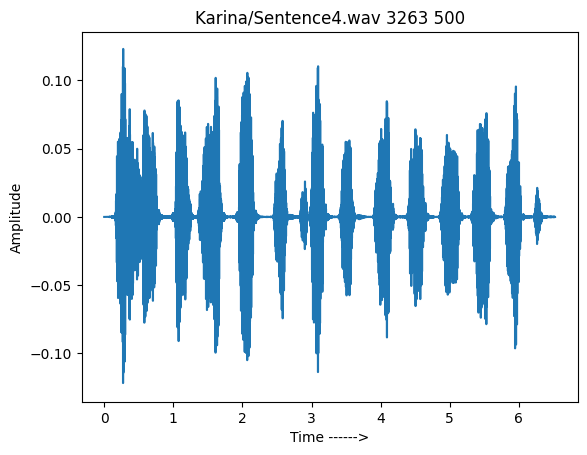

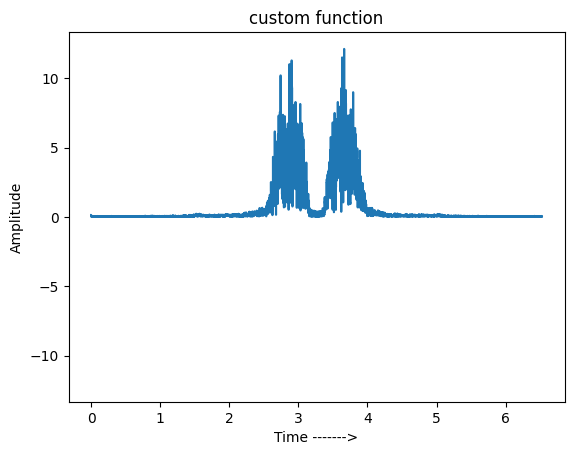

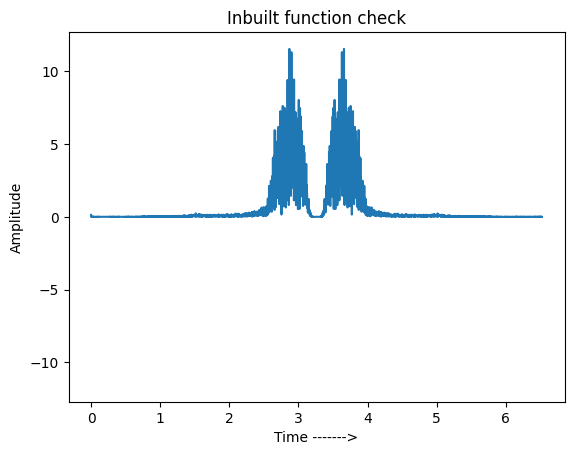

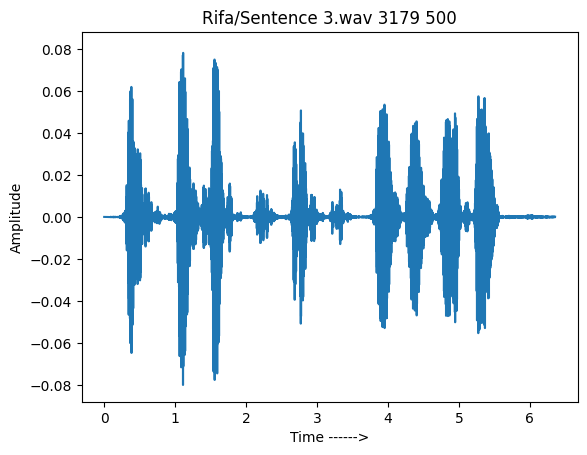

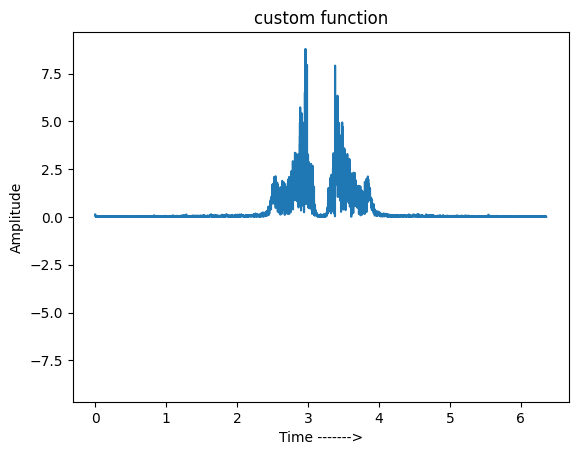

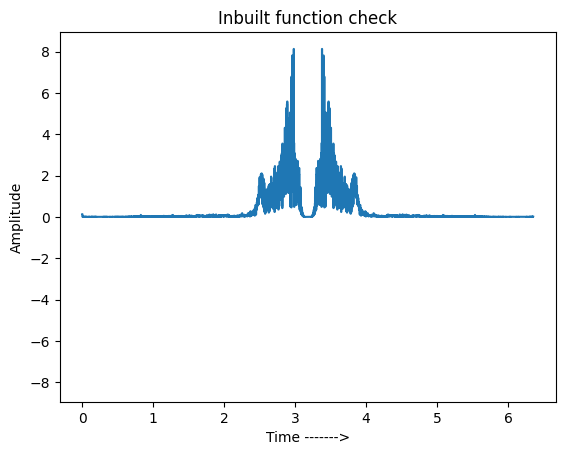

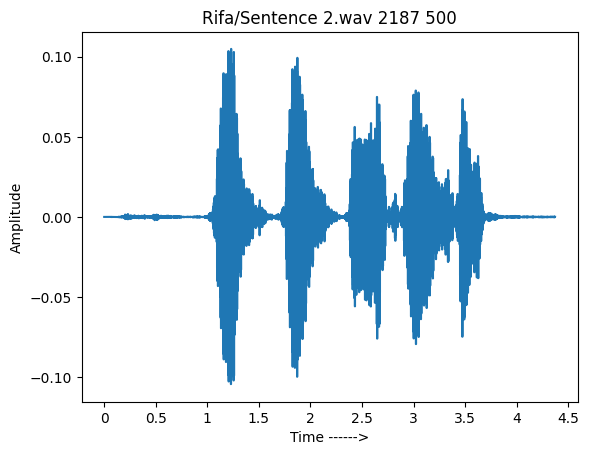

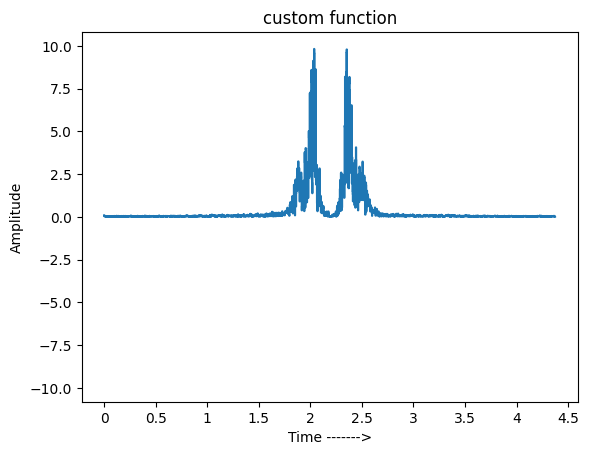

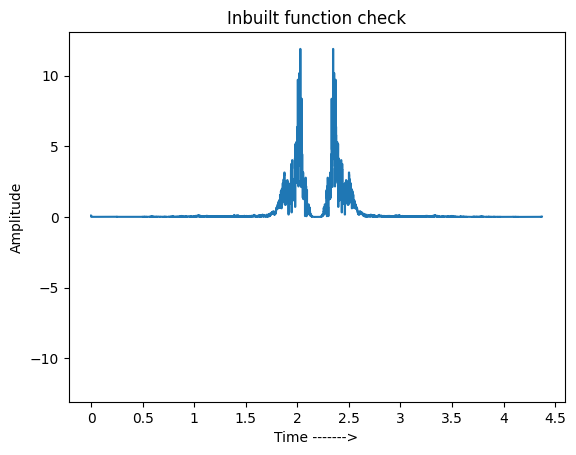

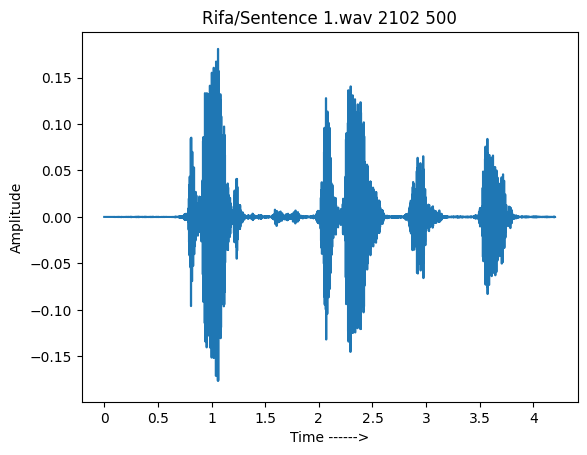

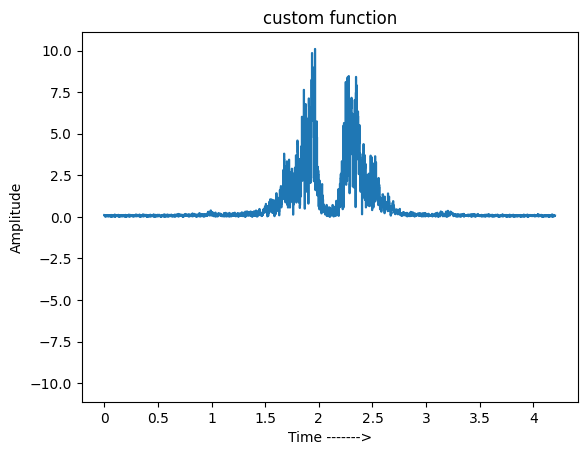

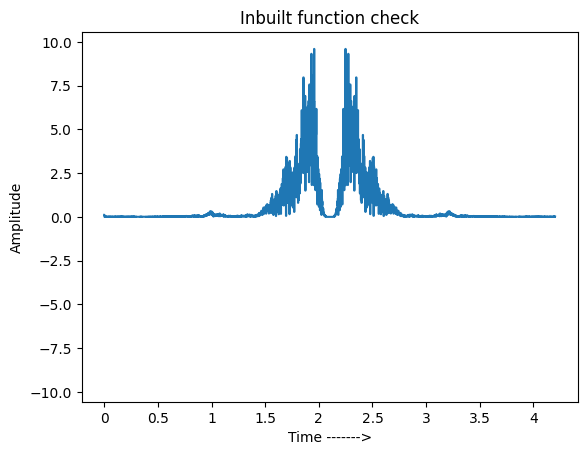

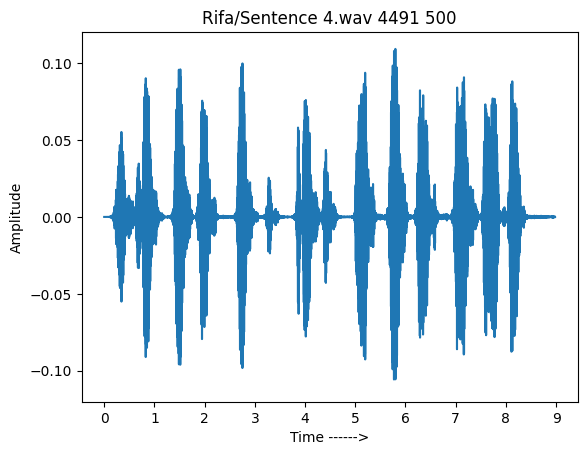

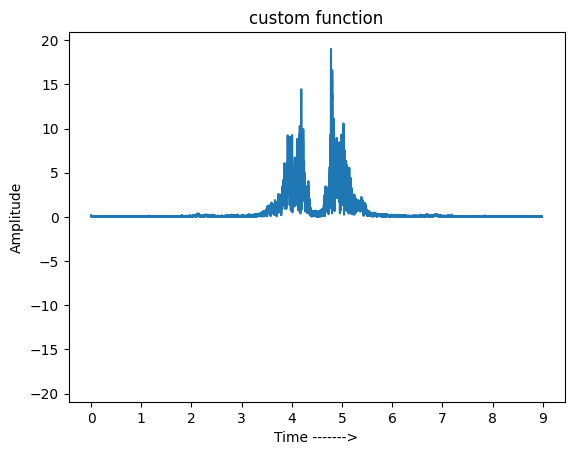

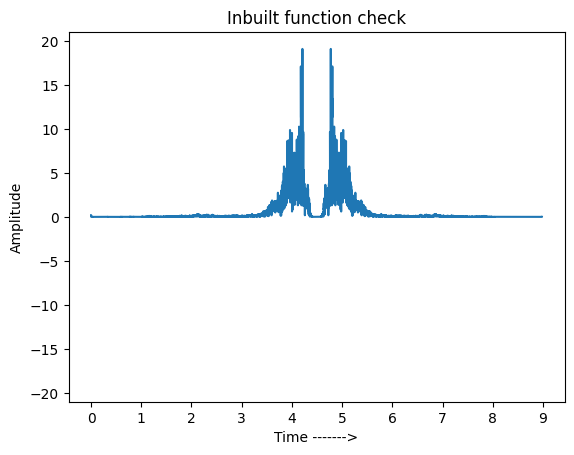

In [21]:
for i in file_path:
    samples, sampling_rate = librosa.load(i,sr=500,mono=True, offset = 0.0, duration = None)
    duration = len(samples)/sampling_rate
    # print(duration)
    plt.title(i + " " + str(len(samples)) + " " + str(sampling_rate))
    librosa.display.waveshow(y = samples, sr = sampling_rate)
    plt.xlabel("Time ------>")
    plt.ylabel("Amplitude")
    plt.show()
    
    
    x = np.abs(dft(samples))
    librosa.display.waveshow(y=x, sr = sampling_rate)
    plt.title("custom function")
    plt.xlabel("Time ------->")
    plt.ylabel("Amplitude")
    plt.show()
    
    
    z = abs(fft.fft(samples))
    plt.title("Inbuilt function check")
    librosa.display.waveshow(y = z, sr = sampling_rate)
    plt.xlabel("Time ------->")
    plt.ylabel("Amplitude")
    plt.show()
    
    wavfile.write("abc.wav", 500, x.astype(np.int16))
